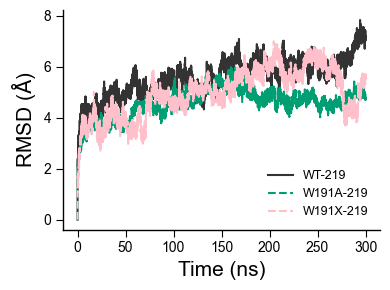

Saved figure to: /Users/k20098771/Data/Figures/RMSD_group2.jpeg


In [12]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
from MDAnalysis.analysis.rms import RMSD
from MDAnalysis.analysis import align
from tqdm.auto import tqdm
import matplotlib as mpl

# -------------------------
# I/O: paths (edit as needed)
# -------------------------
WT_TOP = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/FL_219_200us_200_0us/step6_6.gro"
WT_TRJ = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/FL_219_200us_200_0us/step7_centered.xtc"

A_TOP  = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31A_219_200us_200_0us/step6_6.gro"
A_TRJ  = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31A_219_200us_200_0us/step7_centered.xtc"

X_TOP  = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31X_219_200us_200_0us/step6_6.gro"
X_TRJ  = "/Users/k20098771/Data/2024/CGtoAA/Startpoint/W31X_219_200us_200_0us/step7_centered.xtc"

# -------------------------
# Selections
# -------------------------
# Use the same alignment philosophy as your RMSF (DAP12 TM helices) if labels allow.
# If your topology has clear identifiers (e.g., resname/segid for DAP12 and TM resid ranges), set:
# align_sel = "(resname DAP12) and name CA and resid 35-65"  # <-- example; adjust to your system
# If not, fall back to whole-protein CA for robust behavior:
# align_sel = "protein and name CA"
align_sel = "index 0:991 and name CA "

# RMSD is computed on these atoms (commonly CA):
# rmsd_sel = "protein and name CA"
rmsd_sel = "index 0:991 and name CA"

# Subsampling stride (frames)
step = 10  # match your RMSF stride of ::10

# -------------------------
# Helper to compute RMSD vs time for one system
# -------------------------
def rmsd_timeseries(top, trj, align_sel="protein and name CA", rmsd_sel="protein and name CA", step=10):
    # Mobile trajectory
    u = mda.Universe(top, trj)

    # Reference = first frame of the same system (keeps model-specific geometry)
    ref = mda.Universe(top, trj)  # loads same traj; ref_frame=0 used below
    # (Cheaper alternative: mda.Universe(top) to use just the topology's coords as ref)

    # Align in-memory to remove overall rotation/translation before RMSD
    # (RMSD(superposition=True) would also superimpose, but pre-aligning helps numerical stability)
    align.AlignTraj(u, ref, select=align_sel, in_memory=True).run()

    # Compute RMSD on Cα (or your chosen selection), every `step` frames
    R = RMSD(u, ref, select=rmsd_sel, ref_frame=0, step=step, superposition=True)
    R.run()
    # R.results.rmsd columns: [frame, time(ps), rmsd(Å)]
    time_ps = R.results.rmsd[:, 1]
    rmsd_A  = R.results.rmsd[:, 2]
    return time_ps * 1e-3, rmsd_A  # return time in ns, RMSD in Å

# -------------------------
# Compute RMSD for three systems
# -------------------------
t_wt,  r_wt  = rmsd_timeseries(WT_TOP, WT_TRJ, align_sel, rmsd_sel, step)
t_a,   r_a   = rmsd_timeseries(A_TOP,  A_TRJ,  align_sel, rmsd_sel, step)
t_x,   r_x   = rmsd_timeseries(X_TOP,  X_TRJ,  align_sel, rmsd_sel, step)

# -------------------------
# Plot styling (to match your RMSF look)
# -------------------------
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
    "font.size": 10,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 5,
    "ytick.major.size": 5,
    "axes.grid": False
})

colors = {
    'WT':   '#333333',   # Dark gray
    'A':    '#009E73',   # (your earlier 'K26A' color reused)
    'X':    'pink',      # (your earlier 'K26X' color reused)
}

plt.figure(figsize=(4,3))

plt.plot(t_wt, r_wt,  label='WT-219',     color=colors['WT'], linewidth=1.5)
plt.plot(t_a,  r_a,   label='W191A-219',  color=colors['A'],  linewidth=1.5, linestyle='--')
plt.plot(t_x,  r_x,   label='W191X-219',  color=colors['X'],  linewidth=1.5, linestyle='--')

plt.xlabel('Time (ns)', fontsize=15, fontname='Arial')
plt.ylabel('RMSD ($\\mathrm{\\AA}$)', fontsize=15, fontname='Arial')

# Tidy axes
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.legend(frameon=False, fontsize=9)
plt.tight_layout()

# Save and show
outpath = "/Users/k20098771/Data/Figures/RMSD_group2.jpeg"
plt.savefig(outpath, dpi=800, format='JPEG', bbox_inches="tight")
plt.show()

print(f"Saved figure to: {outpath}")


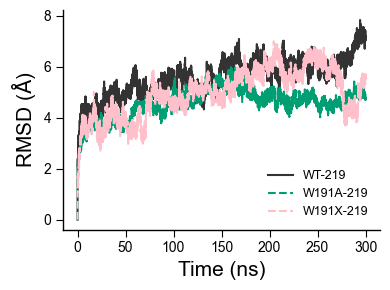

Saved figure to: /Users/k20098771/Data/Figures/RMSD_group2.jpeg


In [15]:
plt.figure(figsize=(4,3))

plt.plot(t_wt, r_wt,  label='WT-219',     color=colors['WT'], linewidth=1.5)
plt.plot(t_a,  r_a,   label='W191A-219',  color=colors['A'],  linewidth=1.5, linestyle='--')
plt.plot(t_x,  r_x,   label='W191X-219',  color=colors['X'],  linewidth=1.5, linestyle='--')


plt.xlabel('Time (ns)', fontsize=15, fontname='Arial')
plt.ylabel('RMSD ($\\mathrm{\\AA}$)', fontsize=15, fontname='Arial')

# Tidy axes
ax = plt.gca()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.legend(frameon=False, fontsize=9)
plt.tight_layout()

# Save and show
outpath = "/Users/k20098771/Data/Figures/RMSD_group2.jpeg"
plt.savefig(outpath, dpi=800, format='JPEG', bbox_inches="tight")
plt.show()

print(f"Saved figure to: {outpath}")